#  Automated Quest Generation for Role-Playing Video Games (RPGs) through Advanced Language Modeling


## 1. Introduction

The project proposes the application of Generative Pre-trained Transformers in the form of Large Language Models (LLMs), specifically open-source pre-trained models like GPT-2, for the automation of quest dialogue generation in role-playing video games. This initiative addresses the significant resource and time expenditure involved in manual quest creation for large-scale games, a process often marked by high costs and labor intensity. By implementing these LLMs, the project aims to streamline content creation, thereby reducing the developmental burden without compromising the narrative quality and player immersion.

All code in this project was run in a Google Colab environment - it would be best to replicate that when running these scripts again. House everything in a folder of your choice, just make sure to set that as the working directory in any notebook.

## 2. Motivation & Previous Work:

As the video game industry evolves, there is a growing trend towards incorporating procedurally generated and machine-learning-based content to create more dynamic and expansive gaming experiences. Despite these advancements, one area that often remains reliant on traditional methods is dialogue creation, with most game narratives and character interactions still being handcrafted. This approach can limit the scalability and variety of in-game content. To address this challenge, we propose utilizing open-source large language models (LLMs), specifically GPT-2 and GPT-2 Medium. These models will be subjected to both fine-tuning and prefix-tuning processes to evaluate their capability in generating cohesive and immersive content. This approach aims to determine if these LLMs can produce dialogue and narrative elements that are not only coherent but also of sufficient quality to be integrated into video games.

The development of AI in video game content creation is hindered by a lack of specialized, open-source datasets for quest data. This scarcity impairs the training of AI models for narrative generation. To address this, there's a pressing need for a comprehensive and accessible database of quest data, alongside methods to consistently produce similar datasets. This approach will enhance AI-driven game content, particularly in narrative and dialogue [1].

A prime example of a suitable dataset for this purpose comes from the game World of Warcraft (WoW), which boasts a collection of approximately 22,000 quests. These quests are formatted with a title, objective, and description, maintaining a consistent structure ideal for NLP. [1] Collects a similar dataset, but its methods for doing so are not publicly available nor is the dataset, thus the need for these such utilities.

In addition to the above motivation, [1] explores a similar problem of fine-tuning a gpt-2 network, as does [2]. However, as the size and complexity of LLM models grow, the need for an alternative method of fine-tuning grows. Prefix-tuning offers a parameter efficient alternative to fine-tuning large aspects of an LLM, with comparable results [3]. This approach to this problem is novel and is evaluated below.

WoW Quest Information:

In the game World of Warcraft, each quest is characterized by a specific title and an objective, which the player must complete to gain rewards such as experience, items, or in-game currency. Players usually receive quests from designated non-player characters (NPCs), who provide a brief introduction and background to the quest through dialogue. This backstory, often referred to as flavor text, enriches the game's narrative but is not crucial for gameplay. Removing these narrative elements would make the quest functional but less integrated into the game's story. This study investigates the potential of using GPT-2, an AI language model, to create such flavor text for quests, based on their titles and objectives. While there are existing methods for generating video game narratives and quests, they often rely on rule-based systems for crafting story text [4]. Our research focuses on assessing the effectiveness of GPT-2 as an alternative to these traditional methods, particularly in generating engaging and contextually relevant quest narratives.

**The goal of this project is therefore three-fold:**

1. Repeatable methods for collection of quest-based non-playable
character (NPC) dialogue dataset. Open-source access to dataset.
2. Implement Fine-Tuning of Pretrained GPT-2 model to generate context-aware and
unique quest descriptions given a quest title and objective, similar to [1].
3. Implement Prefix-Tuning of Pretrained GPT-2-Medium model (novel approach) to
generate context-aware and unique quest descriptions given a quest title
and objective

## 3. Data:

As mentioned in the motivation, there was not a pre-defined dataset for this project, and thus a portion of this project was devoted to writing methods to collect a text dataset from a community-based website of WoW quests: https://www.wowhead.com/quests [5]


The web-scraping utility files used are summarized in the code section of this report. Essentially, URLs had to be collected from an online dataset, that would only display 1000 quests maximum at a time without any filters. Therefore, manual categorical filter information was collected from the website, and URLs were then found by filterin the website's search feature by category.

Once a list of URLs was formed, actual quest information was parsed from the html of each quest page.

There were datasets formed for each training task, as they required slightly different setups to function optimally:


**Fine-Tuning**
Data was formatted in this scenario as a corpus of text, separated by special tokens inserted into the dataset:

*   <|startoftext|>: Start of a data point
*   <|obj|>: Token that preceeds the objective text
*   <|text|>: Token signifying where the model should start description generation
*   <|endoftext|>: End of a data point  

EX: <|startoftext|> The Rider's Bind <|obj|> Find 4 Playful Serpents. <|text|> Have you seen the young serpents in the training
yard? The littles ones tend to be mischievous, and some of them ran off to play before the training session. The Mistress
will get angry if she discovers they're missing. Would you go find them and bring them back to me? I don't want them to get
into trouble. They like to play out in the open, so look for them in courtyards and around the spires. <|endoftext|>


**Prefix-Tuning**
Data was formatted in this scenario similar to a summarizer approach, where one column functioned as the model input in the form of a quest name and objective. The other column was the quest description.

EX: Name: Glorious Pursuits, Objective: Kidnap Mephiles the Loyal, then kill 6 Morbid Disciples to intimidate him.
Answer: Perhaps Draka has forgotten her loyalties, but I will fulfill my mission.
My enemy--the lich Mor'Bitan--hides within the House of Rituals. For some reason, his underlings skulk in this marsh.
We have not learned why they are here, but my devoted have spotted Mor'Bitan's second-in-command, Mephiles the
Loyal. He will have our answers. Collect him for me. Once you capture him, slay his kin. Weaken his resolve. I will prime
my base for his interrogation

Quest descriptions also often contains string placeholders, which would be filtered and replaced by code at runtime to display the correct values. Examples of this are "<name>" and "<class>", which represent the name and class of the current player the non-playable character (NPC) is in dialogue with. There are a number of examples output in the test set that demonstrate both models ability to generate contextually aware instances of these placeholders.

Additionally, some text is generated surrounded by "<>" characters, which is intended to represent description of a setting or emotion - again, both models are able to produce output that mimics this format.



---



The data is organized as follows in the project directory:

*   .csv files that start with 'url_', contain the raw URL strings to valid quests.
*   .csv files that start with 'quest_', contain the raw quest string parsed from wowhead.com. They are split up into sections due to timeouts and such during data collection.
*   '.csv' and '.txt' files that are stored in the main directory are formatted data from the raw data files, and are used to train and evaluate.



## 4. Code:

Files:
*   fine_tuning_quest.ipynb: Fine-Tuning GPT-2 Network
*   prefix_tuning_quest.ipynb Fine-Tuning GPT-2 Medium Network - includes some homework 4 code
*   wowhead_url_scraper.ipynb Utility for Data Collection


### Import before Quick Test:

In [ ]:
import os, sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
os.chdir('drive/MyDrive/cmpt413_proj')

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import argparse, os, string, sys
import torch
import sacrebleu
from tqdm import tqdm
from pathlib import Path
from transformers import AutoModelForCausalLM, AutoTokenizer, default_data_collator, get_linear_schedule_with_warmup
from datasets import load_dataset
from torch.utils.data import DataLoader
from peft import PrefixTuningConfig, get_peft_model, TaskType
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from peft import PeftModel
import torch.nn.functional as F
import pandas as pd
from transformers import pipeline

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Quick Test Fine-Tune:

In [ ]:
prompt = '<|startoftext|> Build a Rocket Ship <|obj|> Find raw materials around this exo-planet to build a rocket ship! '

In [ ]:
from transformers import AutoModelWithLMHead
from transformers import AutoTokenizer
from transformers import pipeline

In [ ]:
def generate_fine_single(prompt, max_length=128, temperature=0.8, top_k=60):
  tokenizer = AutoTokenizer.from_pretrained('gpt2')
  generator = pipeline('text-generation', model='data/ft_gpt2_run10', tokenizer=tokenizer)
  return generator(
        f'{prompt}',
        max_length=max_length,
        temperature=temperature,
        top_k=top_k
  )[0]['generated_text']

generate_fine_single(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"<|startoftext|> Build a Rocket Ship <|obj|> Find raw materials around this exo-planet to build a rocket ship!  <|text|> Our mining partner is working on a device called a satellite. It will be able to move all of its components around the exo-planet. \n\nWe've been testing it out here at the Depot, but we need to test it out to see if it's worth the trouble.\n\nLook for raw materials around this exo-planet.  "

### Quick Test Prefix-Tune:

In [ ]:
prompt = f"Generate a description for the following video game quest: Name: Water Ways, Objective: Kill all the Ogres by the river, near the town of Algredon. <|endoftext|> "

In [ ]:
def generate_prefix_single(prompt, length=128, temperature=0.7, top_k=120):
    # tokenizer
    tokenizer = AutoTokenizer.from_pretrained('gpt2-medium')
    tokenizer_pad_token_id = tokenizer.eos_token_id \
      if tokenizer.pad_token_id is None else tokenizer.pad_token_id

    # model
    model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
    modelfile = os.path.join('data', 'pt_gpt2_medium_128_length')
    model = PeftModel.from_pretrained(model, modelfile + '.pt')
    model.eval()
    model = model.to(device)

    context_tokens = tokenizer.encode(prompt, add_special_tokens=False)
    context = torch.tensor(context_tokens, dtype=torch.long, device=device)
    num_samples = 1
    context = context.unsqueeze(0).repeat(num_samples, 1)
    generated = context
    eos_token_id = tokenizer.eos_token_id

    with torch.no_grad():
        for _ in range(length):
            outputs = model(generated)
            next_token_logits = outputs.logits[:, -1, :] / (temperature if temperature > 0 else 1.)

            top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
            probabilities = F.softmax(top_k_logits, dim=-1)

            next_token = torch.multinomial(probabilities, num_samples=1)
            next_token = top_k_indices.gather(-1, next_token)
            if next_token.item() == eos_token_id | next_token.item() == tokenizer.bos_token_id:
                break

            generated = torch.cat((generated, next_token.to(device)), dim=1)

    out = generated
    out = out[:, len(context_tokens):].tolist()
    for o in out:
        text = tokenizer.decode(o, clean_up_tokenization_spaces=False)
        print(text)

generate_prefix_single(prompt)

The water in the Great Ocean flows in all directions, but the creatures that live in its depths are of the desert variety.  There are few who swim from the Great Ocean to the desert.  But there is one that lives there.  He is named Phaeris.  He is also called the 'water god'.  He commands all the water creatures in the waters of the Great Ocean.  He is the only deity that can stop the flood.  


### Training:

**Fine-Tuning:**

*   Time: ~1.5 hours
*   Epochs: 4
*   LR: 3e-5
*   Batch Size: 4


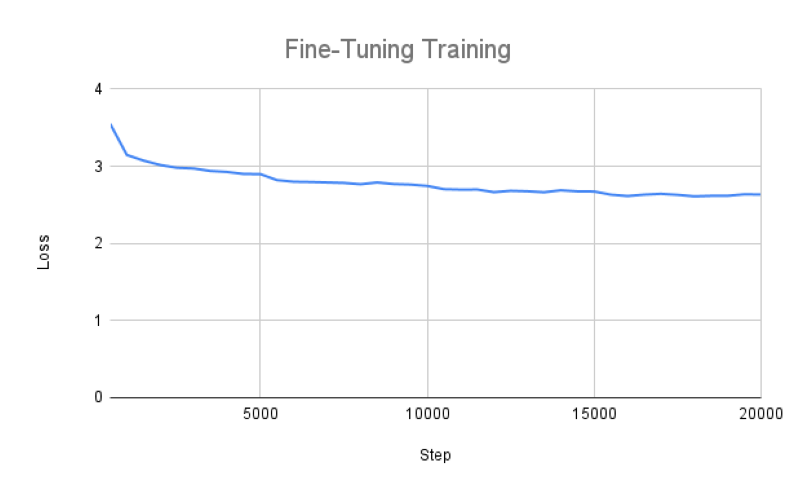

In [1]:
#@title Show Training (Fine-Tuning) Image:

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'Fine-Tuning Training.png'  # Replace with your image path
image = Image.open(image_path)

# Set the size of the figure
plt.figure(figsize=(10, 10))  # You can adjust the size as needed

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

**Prefix-Tuning:**

*   Time: ~45 min
*   Epochs: 1
*   LR: 5e-5
*   Batch Size: 4
*   Prefix Projection: True
*   Virtual Tokens: 8


Training for more than one eqpoch resulted in over-fitting to the training data, and the English language correctness drastically decreased.

## 5. Experimental Setup

Given the creative and narrative nature of quest descriptions in video games,
qualitative assessments (user review) are more suitable evaluation techniques when compared with more standardized NLP measures [2]. A survey was sent to a private Discord Server - ‘Devs & Dorks’. I am a member of this server, and it is a community of independent game developers and studios (mostly collected together to support each other with shared assets and code utilities, as well as marketing strategies).

A 5-point Likert scale measure was employed (1 (strongly disagree) to 5 (strongly agree)), with 3 distinct questions:

1. (Coherence) The goal is clear from the description.
2. (Language) The description makes use of correct English.
3. (Usefulness) The quest could be used in a procedural video game, with simple quest structures.


The quest dialogue texts included in this survey were as follows:

Quest #1: WoW Dataset
Title: Smoke Over the Mountain  
Objective: Find Pathfinder Yip's plane.
Description: < Pathfinder Jeb looks at the mountain ridge beyond the camp and sniffs. >
"I don't like it. Pathfinder Yips should've been here days ago. Was gonna help me teach this new batch of explorers how to climb these pillars safely. Now I see smoke in the distance. I don't like it at all."

Quest #2: Wow Dataset
Title: Collecting Kelp
Objective: Bring 4 Crystal Kelp Fronds to William Pestle in Goldshire.
Description: I can make an invisibility liquor for Maybell, so she can slip away from the Maclure Vineyards and go to Tommy Joe. But to make the liquor, I need some crystal kelp. Although the kelp usually grows in the ocean. . . sometimes murlocs collect it. See if the murlocs near Crystal Lake have any. Crystal Lake is just east of Goldshire.

Quest #3: Fine-Tuned Model Generated
Title: Lord Grayson Shadowbreaker
Objective: Speak with Lord Grayson Shadowbreaker in Stormwind's Cathedral District.  
Description: Grayson's most revered followers, including his eldest, Grayson Deathguard, are among those who would make him the next king of the Stormwind. Grayson's death is still felt long after the first wave of Stormwind's defeat. Travel to Stormwind and find the Archdruid of Thunder Bluff at the Cathedral of the Crimson Flame.

Quest #4: Fine-Tuned Model Generated
Title: Supplies from The Archivists' Codex
Objective: Speak with Archivist Roh-Suir in the Reliquary of Remembrance in Korthia.  
Description: I sense a power in the crystal in your hand, <name>. Perhaps there is more to it than meets the eye. I think I've found a sample of the crystal. It has some interesting properties, perhaps it is of great importance. As for your research, I trust you will be able to find the source of it. You ought to visit with Roh-Suir.

Quest #5: Prefix-Tuned Model Generated
Name: Centuries in Sentries
Objective: Kill 5 Spirit-Bound Sentries and then use the Resonance Crystal to capture the Zandalari spirits trapped within.
Description: The Zandalari are among the few outsiders to have successfully escaped from the Ruins of the Broken Isles.
Their spirit-bound sentries are not just an obstacle for us, <name>. They are the only obstacle to our survival. I will take control of their spirit, then use the Resonance Crystal to capture the spirits that threaten us. For the time being, let's focus on the task at hand.

Quest #6: Fine-Tuned Model Generated
Title: Run Out the Guns
Objective: Use a Northwatch Shore Battery to destroy 10 Rageroar Rowboats.
Description: We can't allow these warships to get any farther into the Hinterlands. The rags are our only defense. We'll have to take out the boats in the open water to get our hold back.  

Quest #7: Fine-Tuned Model Generated
Title: Bulging Nightmare Pod
Objective: Bring the Bulging Nightmare Pod to Professor Pallin in Dalaran.
Description: <The pod appears to be full of rotting, decaying undead creatures. A large chunk of it is filled with a sort of twisted electricity. Perhaps it is a symbol of some kind of threat. >

Quest #8: Prefix-Tuned Model Generated
Name: The Graveyards of Alterac
Objective: Assault a graveyard, then return to Corporal Teeka Bloodsnarl in Frostwolf Village.
Description: The last hope for our people lies in this graveyard.
With the Scourge destroying the land, their leader, Lordaeron, has declared war on us. The Scourge's camp lies in the eastern end of the graveyard. The only way to defeat them is to assault their base and destroy their defenses. Or, find a grave and slay them there, then return to me.

Quest #9: Fine-Tuned Model Generated
Title: Establish Your Garrison
Objective: Build your garrison.  
Description: Now that you've gathered all of the garrison data together into a coherent structure, let's start construction. We're gathering the information we need to plan our strategy. We'll go after the leaders of the three tribes. Take this guide and use it to establish your garrison.

Quest #10: WoW Dataset
Title: Neltharion's Legacy
Objective: Meet Nozdormu in Valdrakken.
Description: <As you stare into the cracked titan gem, a voice echoes through your mind. >

<name>! This is Nozdormu.

The time to redeem the legacy of your creator, Neltharion, is at hand.

You hold a vital piece to the artifact Neltharion once used to control you and all of the dracthyr.

Meet me in Valdrakken. There is much to discuss.

Quest #11: Prefix-Tuned Model Generated
Name: Booty Bay or Bust!
Objective: Speak with McGavan in Booty Bay.   
Description: Now that we have our items and the best gear, I'm ready to head out on our next mission.
You can help out with the rest of the team. My mentor, the Darkmoon Follower, has suggested that you take a ship to Booty Bay. There, you'll find an old, worn-down ship, a treasure trove of gold and other good stuff. Head up north to the Bay of Steel and take these items to McGavan in Booty Bay.

Quest #12: Prefix-Tuned Model Generated
Title: Whispers in the Void
Objective: Speak to Gilner Greymoss in the Sanctuary of the Void.
Description: We have a problem, <name>. We will lose the war if we let the Void in.
I have been hearing rumors of a new threat to the world. I have been working with the shaman of the Void to find out what the mysterious creature is. I am certain that Gilner Greymoss is the shaman of the Void, and he will hold the key to our victory. I will take you to him and show you the way.   

Quest #13: WoW Dataset
Title: Fleet-Footed and Fastidious
Objective: Help Rana recover 6 Stolen Relics and slay 80 Thieving Mawrats.
Description: When the Mawsworn came to Zereth Mortis, they brought mawrats with them!
A swarm of their mawrats overran my cave, making off with many of our research items!
Rana is assembling a team to help recover the items. Meet up with her and aid in the effort.

Quest #14: Prefix-Tuned Model Generated
Name: Assault on Stonard
Objective: Slay 6 Stonard Defenders.
Description: The enemy is strong, <name>. There are a few Stonard defenders that stand in our way. The next time you join the battle, take the stonard and head north to Northstar. I will send you to the Stonard Keep, where each of us will have a proper fight. It will be the last time we will fight. It's time we give them a taste of what we are made of.

Quest #15: WoW Dataset
Title: With Hope in Hand
Objective: Establish a portal to Orgrimmar at the Argent Tournament Grounds.
Description: You must bring word of what we have uncovered back to Orgrimmar. One of our mages can open a portal for you at the tournament grounds. As for the Argent Crusade, we must remain a bulwark against the Scourge. If you wish to continue aiding us, I will see to it that your skills are put to good use. May the Light protect you, <name>.



---



In addition to the survey questionnaire, the BLEU score was calculated for ~500 test prompts for the Fine-Tuning case. This was done in an effort to validate the structural similarity between the input and output, as it was expected that the model regenerate the entire sequence - both the prompt and its generated description. Additionally, the presence of several special tokens that were input into the training data to separate data points and inform the model where to generate text.

BLEU (Bilingual Evaluation Understudy) score is a metric used to evaluate the quality of machine-translated text compared to human translations. It measures the correspondence between a machine's output and that of a human, assessing how many words and phrases in the machine translation appear in the reference human translation, and how many are in the correct order [6]. This was used in this case as we wanted to ensure atleast some of the input prompt was matching with the output, and that sentences remained structurally similar - "<|startoftext|>...<|obj|>...<|text|>...<|endoftext|>"

## 6. Results

The best fine-tuned model save can be downloaded from: https://drive.google.com/drive/folders/1-ZORPiO_sgrVRSsvrBar-ZmIvMZQM2HV?usp=sharing

The best prefix-tuned model save can be downloaded from: https://drive.google.com/drive/folders/1-0_h9VeBuCSZ0_iBHiyowtE4fxXXWMCG?usp=sharing

The whole data folder (with all model saves), can be downloaded from: https://drive.google.com/file/d/1uYRghYA5T0NoD-s0cg892xe9n-dxsc_G/view?usp=sharing


### Inference:

When generating text using models like GPT-2, two commonly used techniques for controlling the randomness of the output are temperature scaling and top-k sampling. These methods influence the probability distribution of the next word to be generated, affecting the variability and creativity of the generated text. They were important hyperparameters that were tuned in the generation process.

### 1. Temperature Scaling

Temperature scaling is a method to control the randomness in the prediction by scaling the logits (the raw outputs of the last layer of the model, before applying the softmax function). The softmax function converts these logits into probabilities. The formula for softmax with temperature \( T \) is:

$$ P(x_i) = \frac{e^{\frac{\text{logits}(x_i)}{T}}}{\sum_j e^{\frac{\text{logits}(x_j)}{T}}} $$

- T is the temperature. A higher T (e.g., > 1) increases randomness (more uniform distribution), making the model more creative but possibly less coherent. A lower T (e.g., < 1) makes the model more confident and conservative in its choices, sticking to more likely options.

### 2. Top-k Sampling

Top-k sampling is a technique where the model's choice of the next word is limited to the top \( k \) most probable choices. The probabilities are recalculated only for these top \( k \) choices, and the next word is sampled from this restricted distribution. The process can be described as:

1. Compute the probabilities of the next word using the softmax function.
2. Select the top \( k \) most likely next words.
3. Renormalize the probabilities of these \( k \) words so that they sum to 1.
4. Sample the next word from this truncated distribution.




The followning settings were used for test cases (which yielded the best results as far as I can tell):

*   Fine-Tuning:temperature ==> 0.8, top_k = 60
*   Prefix-Tuning: temperature ==> 0.9, top_k = 100




### **Survey**

43 responses were recorded over the course of roughly 1 week. The results of the survey can be found in 'quest_dialogue_generator_survey_data.xlsx' in the project directory.

The following graph presents the results (see Experimental Setup for questions):





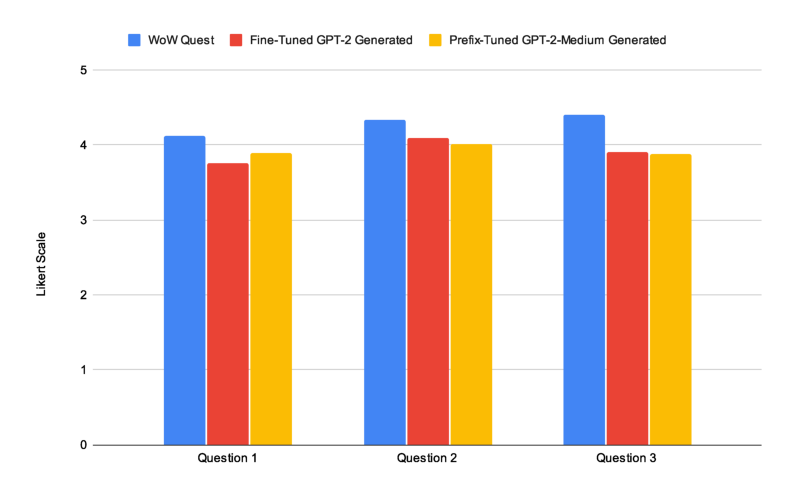

In [ ]:
#@title Show Survey Image:

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'chart-(1).png'  # Replace with your image path
image = Image.open(image_path)

# Set the size of the figure
plt.figure(figsize=(10, 10))  # You can adjust the size as needed

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

### **BLEU**


The BLEU score for ~500 test prompts chosen from a test set of WoW quests not included in training was 30.05, suggesting that output descriptions did tend to adhere to the desired format.

## 7. Analysis of Results


The results from the survey demonstrate the similarities between the generated
content and the content directly pulled from the Wowhead.com quest databank. While
the quest structure is simple, it should be noted that this was purpose-built for a
scenario that required quests to potentially be calculated at or close-to game runtime.

While the sample size of the results is small, the conclusion can be drawn that this utility could be suitably applied in a relatively simple game structure as a tool to generate unique and interesting quest content that adhere to a structured format.

The Prefix-Tuned GPT-2-Medium model kept up performance-wise with a fully fine-tuned
GPT-2 model, suggesting the novel approach to quest text training as a possible
alternative to fine-tuning. This finding should be especially important as Large
Language Models (LLMs), like the GPT family, will continue to grow in complexity and
parameter size. While capabilities increase with model size, they become more
difficult for a wider range of people to fine-tune due to computational resource
expenditure limits - however prefix-tuning offers a parameter-efficient method of
altering the structure of an LLM’s output and could be more readily used in the future.

Comparing to the results of [1], who performed a similar task of fine-tuning, the results seem generally comparable. They measured the efficacy of their models similarly using an online survey - albeit to a larger and more varied target audience. They also used a 7-point Likert scale versus 5 for this project. Their results suggested a similar level of usefulness in terms of quest generation, with handcrafted quests scoring higher than the content generated by the fine-tuned model (but not by a huge margin). This was the case for both the prefix-tuned and fine-tuned model employed for this project, again confirming that prefix-tuning is a suitable alternative to fine-tuning for future NPC dialogue generation projects.

## 8. Future Works


Future works should focus on prefix-tuning of even more powerful pretrained LLMs such as GPT 3, now that it has been shown as a suitable alternative to full model fine-tuning for the quest generation process.

Integration with a mainstream game engine such as Unity, as a tool focused for developers, would also be a unique pathway this project could pursue.

Future works should also focus on establishing standardized protocol to perform more rigorous evaluation of results for this type of problem - where typical evaluation measures would not capture the creative and narrative components involved in quest dialogue curation.

## 9. References

[1] J. van Stegeren and J. Myśliwiec, "Fine-tuning GPT-2 on annotated RPG quests for NPC dialogue
generation," in Proc. 16th International Conference on the Foundations of Digital Games (FDG) 2021
(FDG’21), Montreal, QC, Canada, Aug. 3-6, 2021, ACM, New York, NY, USA.

[2] S. Värtinen, P. Hämäläinen, and C. Guckelsberger, "Generating Role-Playing Game Quests With GPT
Language Models," in IEEE Transactions on Games, [Online]. Available: DOI 10.1109/TG.2022.3228480 .

[3] X. L. Li and P. Liang, "Prefix-Tuning: Optimizing Continuous Prompts for Generation," arXiv, 2101.00190
[cs.CL], Jan. 2021. [Online]. Available: https://arxiv.org/abs/2101.00190

[4] Quinn Kybartas and Rafael Bidarra. 2017. A Survey on Story Generation Techniques for Authoring Computational Narratives. IEEE Transactions on Computational Intelligence and AI in Games 9, 3 (9 2017), 239–253. https://doi.org/10.1109/TCIAIG.2016.2546063

[5] Wowhead Quest Database. Available: https://www.wowhead.com/quests

[6] K. Papineni, S. Roukos, T. Ward, and W.-J. Zhu, "BLEU: a Method for Automatic Evaluation of Machine Translation," in Proceedings of the 40th Annual Meeting of the Association for Computational Linguistics, Philadelphia, PA, USA, 2002, pp. 311-318.

## 10. Code Utils (Ignore):

In [4]:
import shutil
import os

In [8]:
!ls

data					notebooks
formatted_data_tagged_prefix.csv	output
formatted_data_tagged_prefix_test.csv	quest_dialogue_generator_survey_data.gsheet
formatted_data_tagged_prefix_train.csv	requirements.txt
formatted_data_tagged_test.csv		wow_classic_quest_categories.csv
formatted_data_tagged_test.txt		wow_quest_categories.csv
formatted_data_tagged_train.csv		wow_wotlk_quest_categories.csv
formatted_data_tagged_train.txt


In [9]:

# Source folder path
source_folder = "data"

# Destination zip file path
zip_file = "data.zip"

# Create a zip file from the source folder
shutil.make_archive(base_name=source_folder, format='zip', root_dir=source_folder)

# Check if the zip file was created successfully
zip_file_exists = os.path.exists(zip_file)
zip_file_exists


True